In [177]:
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import seaborn as sns

import matplotlib.pyplot as plt
#to avoid writing plot.show
%matplotlib inline
from sklearn.impute import SimpleImputer

In [178]:
df=pd.read_csv("arrhythmia.csv",header=None)

In [179]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [180]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [181]:
#Dimension of dataset.

df.shape

(452, 280)

In [182]:
#concise summary of the dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [183]:
#descriptive statistics of dataframe.

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [184]:
#Counting total Number of null values

pd.isnull(df).sum().sum()

np.int64(0)

In [185]:
#Replacing ? with np.nan value-

df = df.replace('?', np.nan)

In [186]:
#final counting total number of null values in dataset

nv=pd.isnull(df).sum().sum()
nv

np.int64(408)

Text(0, 0.5, 'Total number of null value in each column')

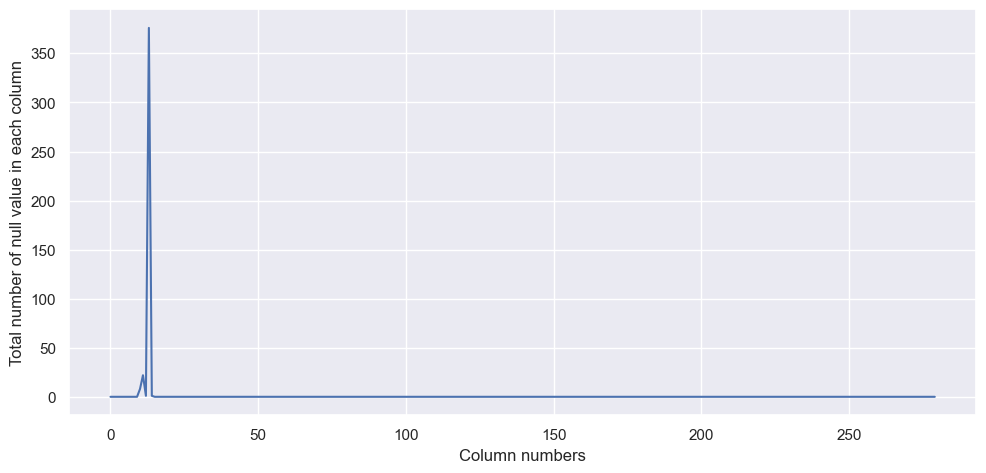

In [187]:
pd.isnull(df).sum().plot()
plt.xlabel('Column numbers')
plt.ylabel('Total number of null value in each column')

Text(0, 0.5, 'Total number of null value in each column')

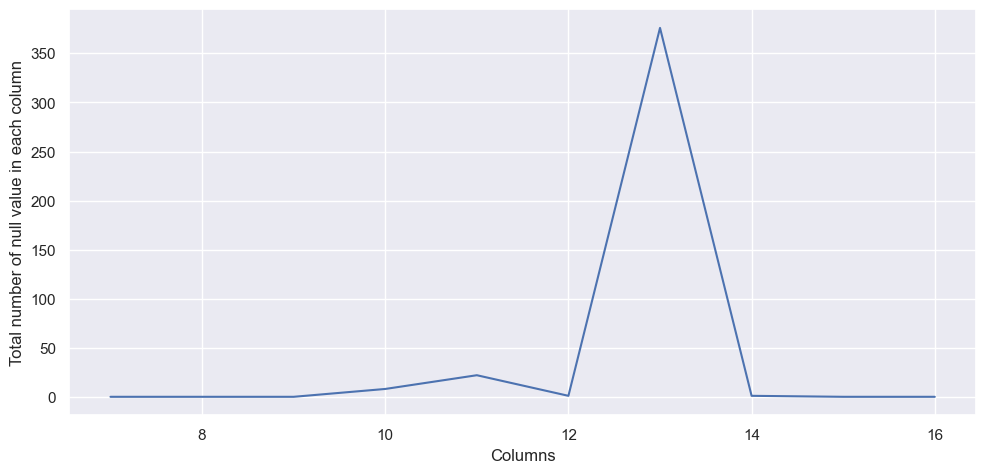

In [188]:
#Zooming in

pd.isnull(df).sum()[7:17].plot(kind="line")
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

In [189]:
#Dropping the column 13

df.drop(columns = 13, inplace=True)

In [190]:
# make copy to avoid changing original data (when Imputing)

new_df = df.copy()

In [191]:
# make new columns indicating what will be imputed

cols_with_missing = (col for col in new_df.columns if new_df[col].isnull().any())
for col in cols_with_missing:
    new_df[col] = new_df[col].isnull()

In [192]:
# Imputation
# my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

my_imputer = SimpleImputer()
new_df = pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns = df.columns

In [193]:
# imputed dataframe

new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [194]:
# DataSet with Zero null Values.

pd.isnull(new_df).sum().sum()

np.int64(0)

In [195]:
#Creating column names

final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [196]:
#Adding Column names to dataset

new_df.columns=final_df_columns
new_df.to_csv("new data with target class.csv")
new_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [197]:
target=new_df["class"]

final_df = new_df.drop(columns ="class")

In [198]:
final_df.shape

(452, 278)

In [199]:
#List with class names

class_names = ["Normal", 
               "Ischemic changes (CAD)", 
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy", 
               "Sinus bradycardy", 
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

In [200]:
t=new_df.sort_values(by=["class"])

In [201]:
# Counting the number of instances for each class

la = t["class"].value_counts(sort=False).tolist()
la

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

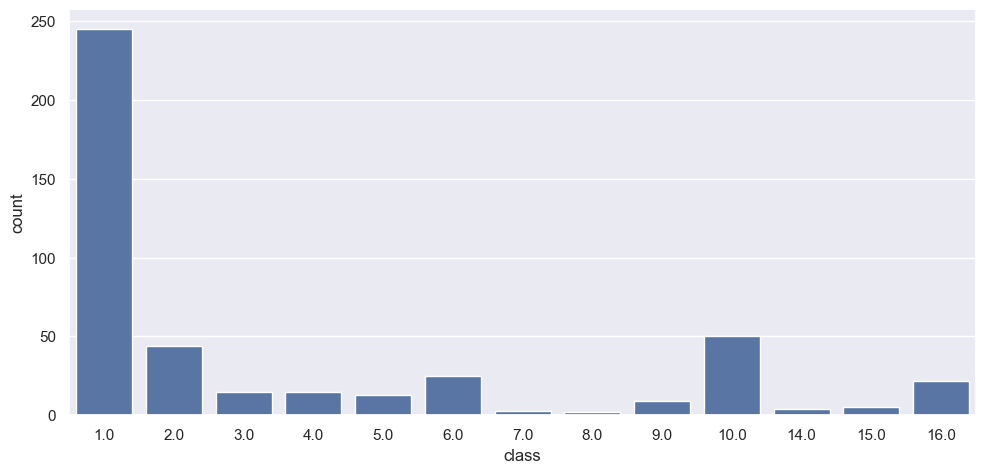

In [202]:
sns.countplot(x ='class',data =new_df) 
plt.show()

In [203]:
values = la[0:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


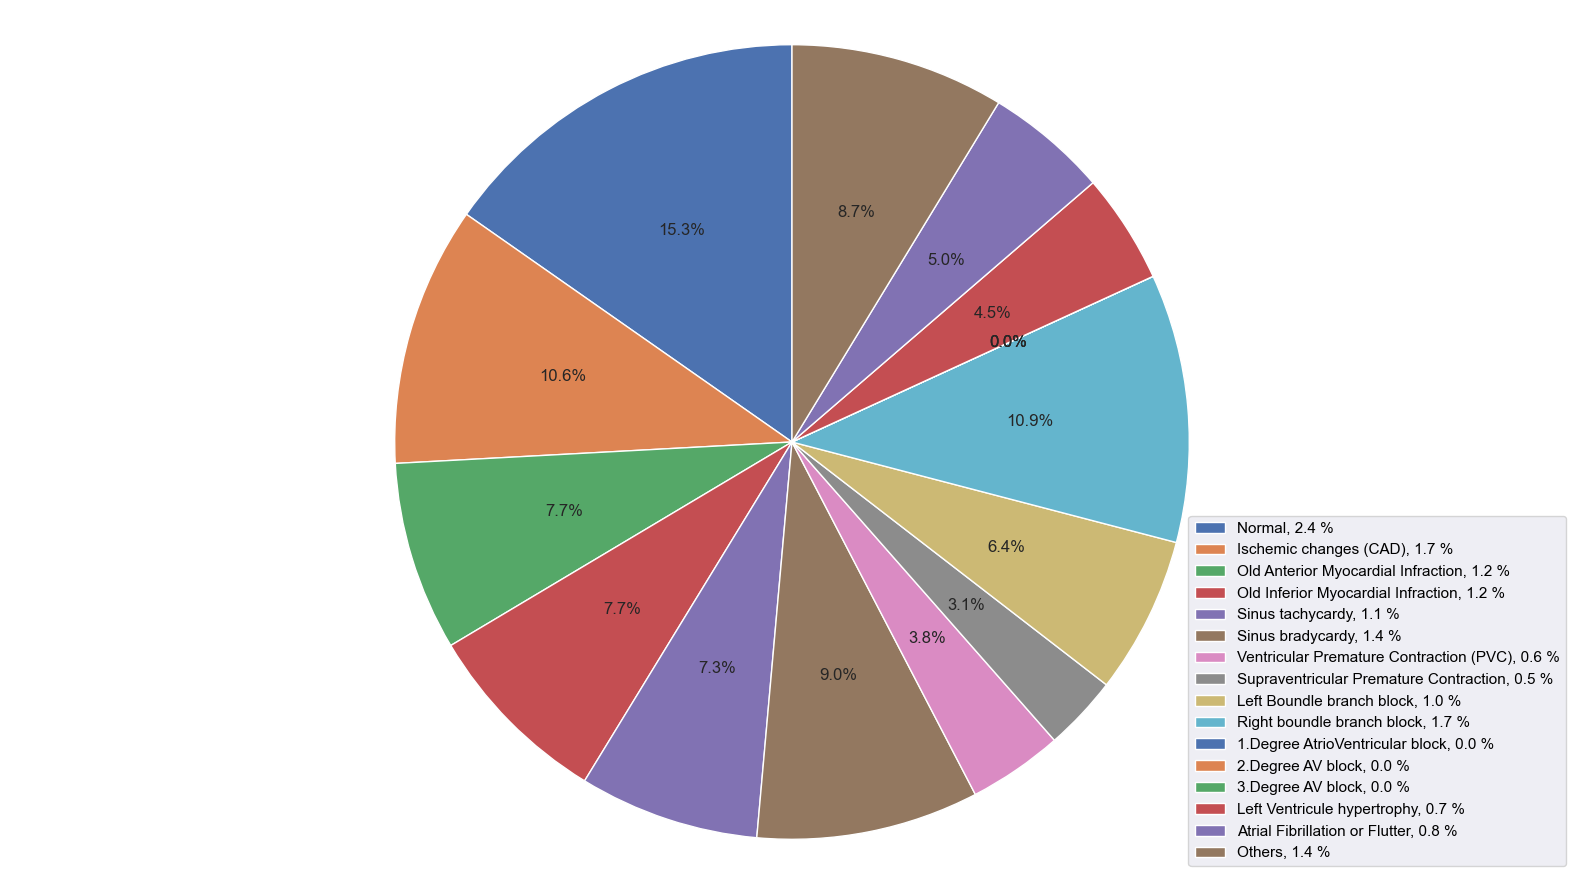

In [204]:
labels = class_names
Log_Norm = []
for i in values:
    Log_Norm.append(mt.log10(i+1))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(Log_Norm, autopct='%1.1f%%', startangle=90)

leg = plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, Log_Norm)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color = 'Black')
plt.tight_layout()
plt.show()

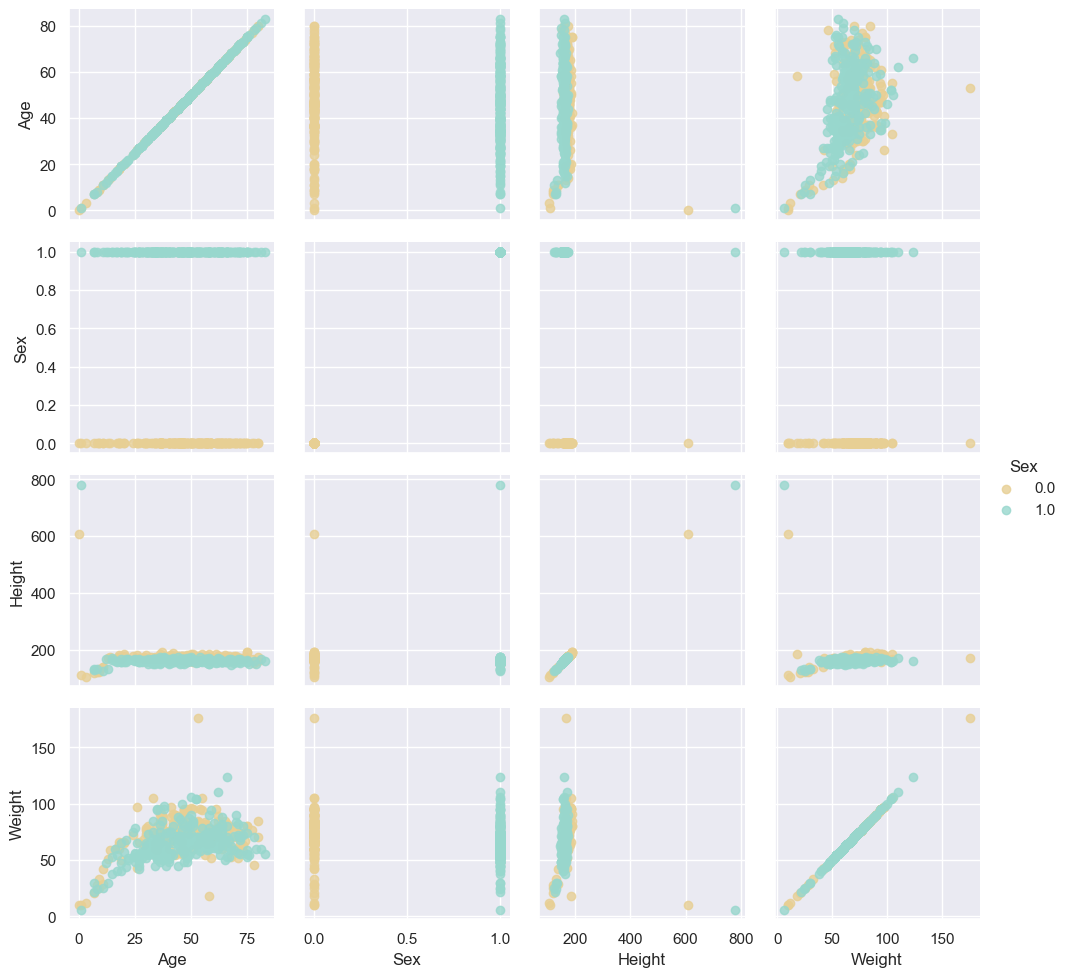

In [205]:
#looking for pairwise relationships and outliers

g = sns.PairGrid(final_df, vars=['Age', 'Sex', 'Height', 'Weight'],hue='Sex', palette='BrBG')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [206]:
sorted(final_df['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

In [207]:
final_df['Height']=final_df['Height'].replace(608,108)
final_df['Height']=final_df['Height'].replace(780,180)

In [208]:
sorted(final_df['Weight'], reverse=True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

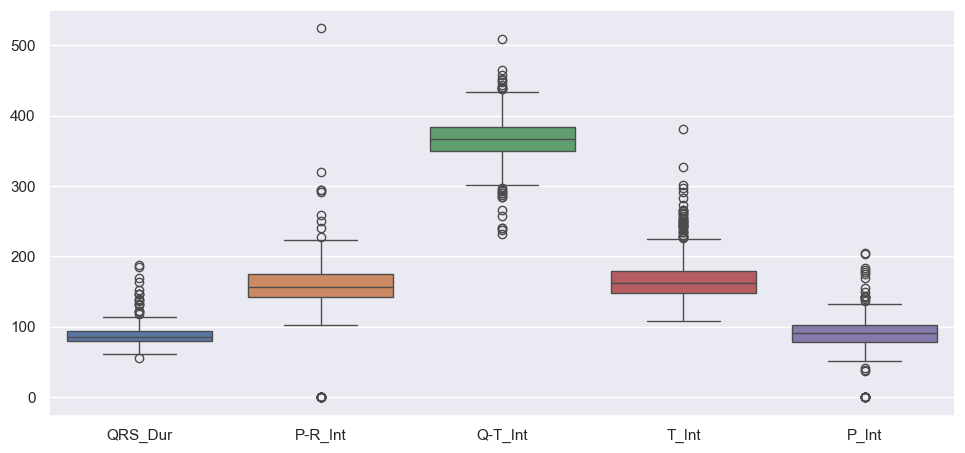

In [209]:
sns.boxplot(data=final_df[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

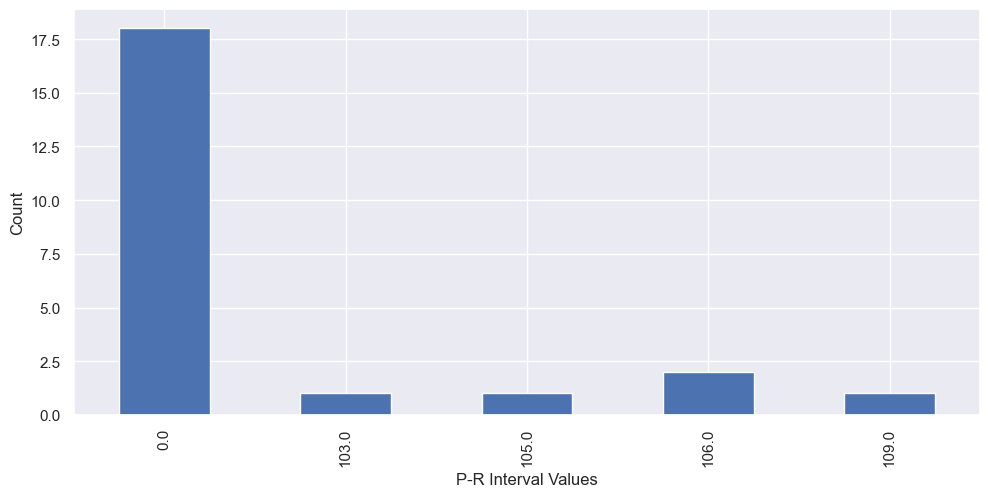

In [210]:
final_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

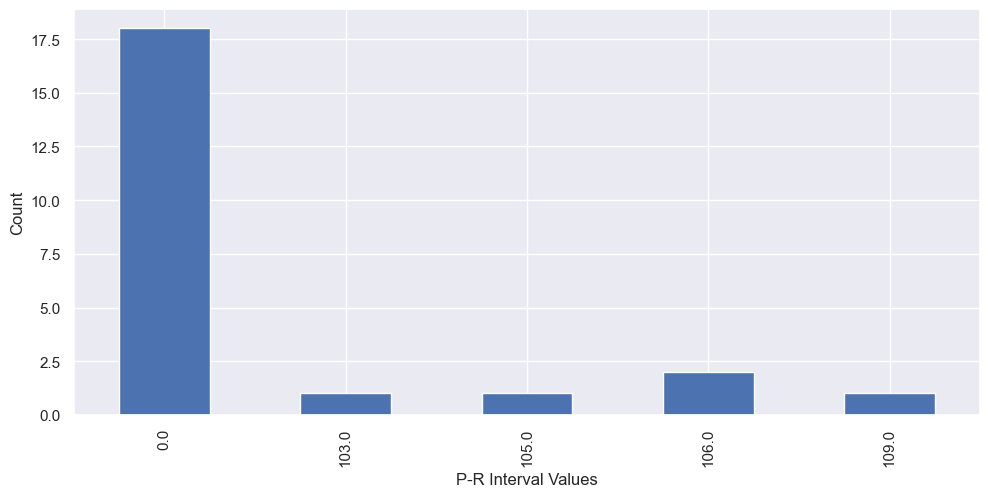

In [211]:
final_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

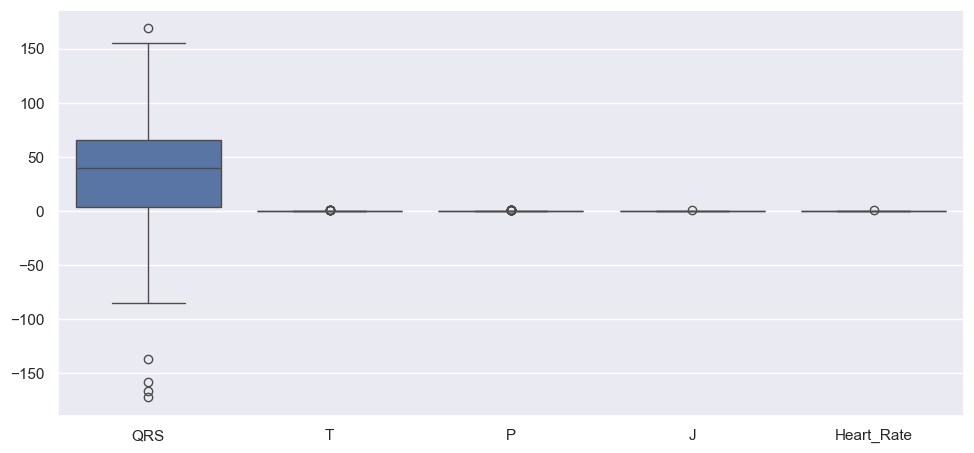

In [212]:
sns.boxplot(data=final_df[["QRS","T","P","J","Heart_Rate"]]);

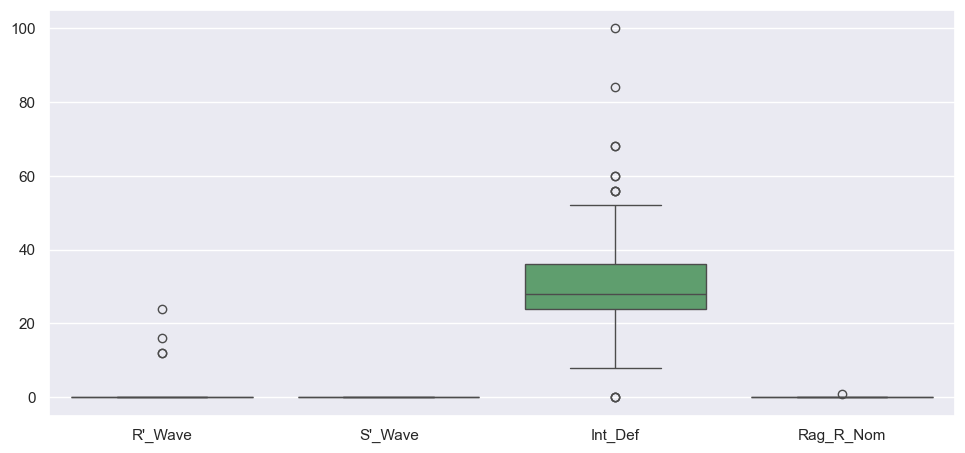

In [213]:
sns.boxplot(data=final_df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]]);

In [214]:
final_df["S'_Wave"].value_counts().sort_index(ascending=False)

S'_Wave
0.0    452
Name: count, dtype: int64

In [215]:
	final_df["V101"].value_counts().sort_index(ascending=False)

V101
216.0     1
112.0     1
84.0      1
72.0      1
68.0      1
64.0      1
48.0      6
44.0      6
40.0     13
36.0     36
32.0     63
28.0     81
24.0     88
20.0     57
16.0     13
12.0      4
0.0      79
Name: count, dtype: int64

In [216]:
final_df["V201"].value_counts().sort_index(ascending=False)

V201
216.0     1
136.0     1
84.0      1
72.0      1
60.0      5
56.0      4
52.0     12
48.0     19
44.0     53
40.0     68
36.0     74
32.0     69
28.0     48
24.0     39
20.0     15
16.0      6
12.0      2
0.0      34
Name: count, dtype: int64

In [217]:
final_df["V301"].value_counts().sort_index(ascending=False)

V301
132.0     1
88.0      2
76.0      2
72.0      1
68.0      2
64.0      3
60.0     16
56.0     26
52.0     57
48.0     68
44.0     76
40.0     74
36.0     49
32.0     32
28.0     13
24.0      4
20.0      6
16.0      1
0.0      19
Name: count, dtype: int64

In [218]:
	
final_df["V501"].value_counts().sort_index(ascending=False)

V501
136.0      1
120.0      2
116.0      1
108.0      1
96.0       1
92.0       1
84.0       1
76.0       2
72.0       3
68.0       4
64.0       5
60.0       9
56.0      22
52.0      67
48.0     105
44.0     104
40.0      73
36.0      29
32.0      12
28.0       3
24.0       2
20.0       1
0.0        3
Name: count, dtype: int64

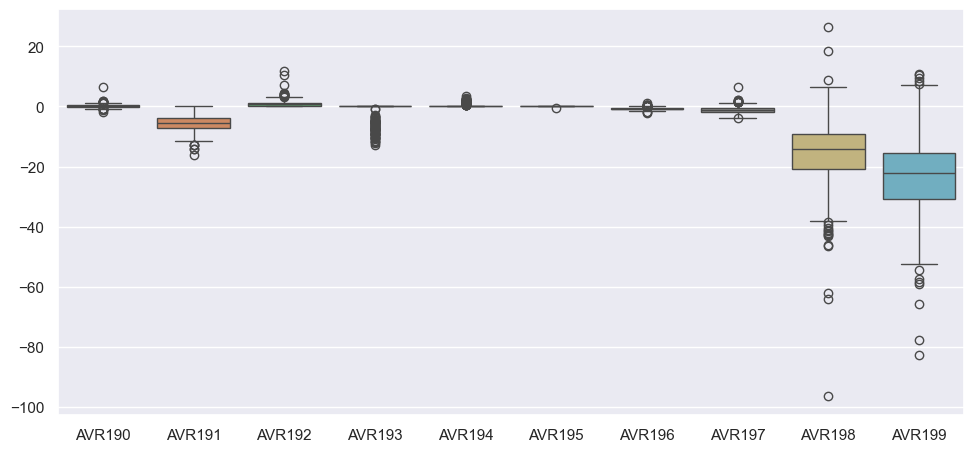

In [219]:
	
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199"]]);

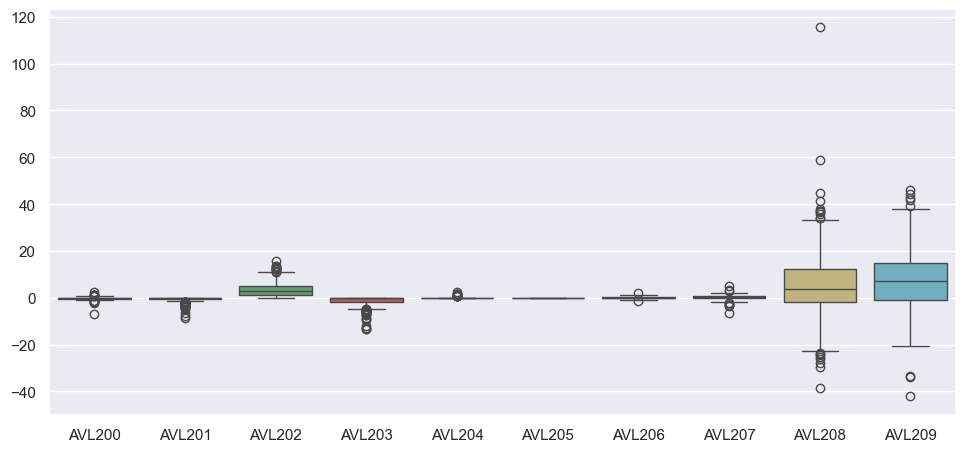

In [220]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209"]]);

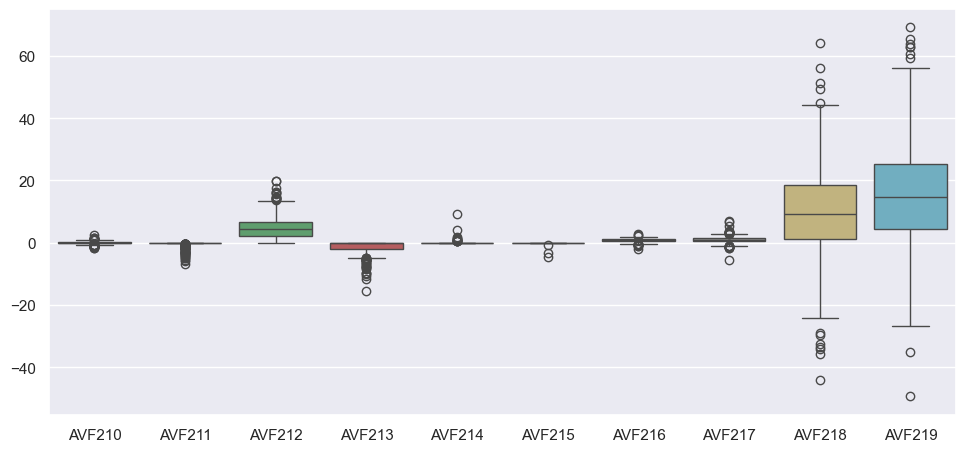

In [221]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219"]]);

In [222]:
#finding correlation with target feature using pearson correlation

target=new_df["class"]
pearsoncorr = final_df.corrwith(other = target,method='pearson')
pearsoncorr.values

array([-9.23812218e-02, -1.78080037e-01, -3.46671442e-02, -9.01507390e-02,
        3.23878728e-01, -9.99540161e-02,  2.83049762e-02,  9.76253981e-02,
       -1.22002504e-01,  1.95854526e-02, -1.68648870e-04,  1.90644217e-01,
       -3.08114850e-02,  3.33672764e-02,  3.96491896e-03,  4.26738126e-02,
        1.95198200e-01,  6.39992472e-02,             nan,  4.27635327e-02,
       -2.01150248e-02,  7.67517615e-03, -3.55694451e-02,  3.20969797e-02,
        3.20969797e-02,  8.30559434e-02, -3.61168680e-03,  4.83674292e-02,
        1.83082712e-01, -1.05049431e-02,  6.65428889e-02,  6.77662940e-02,
        4.17574601e-02,  7.98435069e-02, -2.01150248e-02,  1.69531020e-02,
       -3.60504699e-02, -6.66334979e-04, -2.36687153e-02,  1.16515578e-01,
        8.16735582e-02,  1.44307782e-02, -3.20137575e-02,  8.34076694e-02,
       -3.08114850e-02,  5.14341059e-02, -3.08114850e-02, -8.40208668e-02,
       -1.15446555e-02, -5.76271452e-03,  2.10381327e-02,  1.73243101e-01,
        2.54790200e-03,  

In [223]:
# Example for DII
dii_cols = [col for col in final_df.columns if col.startswith('DII')]
final_df['DII_mean'] = final_df[dii_cols].mean(axis=1)
final_df['DII_max'] = final_df[dii_cols].max(axis=1)

# Similarly for DIII
diii_cols = [col for col in final_df.columns if col.startswith('DIII')]
final_df['DIII_mean'] = final_df[diii_cols].mean(axis=1)
final_df['DIII_max'] = final_df[diii_cols].max(axis=1)

# Similarly for AVR
avr_cols = [col for col in final_df.columns if col.startswith('AVR')]
final_df['AVR_mean'] = final_df[avr_cols].mean(axis=1)
final_df['AVR_max'] = final_df[avr_cols].max(axis=1)

# Repeat for AVL, AVF, V1, etc.


In [224]:
selected_features = [
    # Demographics
    'Age', 'Sex', 'Height', 'Weight', 'Heart_Rate',

    # Time Intervals
    'QRS_Dur', 'P-R_Int', 'Q-T_Int', 'T_Int',

    # Amplitudes & Morphology
    'Q_Wave', 'R_Wave', 'S_Wave', "R'_Wave", "S'_Wave",
    'Amp_R_Wave', 'JJ_Wave', 'Int_Def', 'QRSA', 'QRSTA',

    # Aggregated Lead Data (Mean of 12 samples)
    'DII_mean', 'DIII_mean', 'AVR_mean',  # removed AVL_mean, AVF_mean, V1_mean

    # Max/Min per lead (Optional for richer info)
    'DII_max', 'DIII_max', 'AVR_max',  # removed AVL_max, AVF_max, V1_max
]


In [225]:

print(final_df.columns)

Index(['Age', 'Sex', 'Height', 'Weight', 'QRS_Dur', 'P-R_Int', 'Q-T_Int',
       'T_Int', 'P_Int', 'QRS',
       ...
       'V6276', 'V6277', 'V6278', 'V6279', 'DII_mean', 'DII_max', 'DIII_mean',
       'DIII_max', 'AVR_mean', 'AVR_max'],
      dtype='object', length=284)


In [226]:
X = final_df[selected_features]  # or use new_df[selected_features] if that's what you're using
y = target  # already defined

In [227]:
final_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6276,V6277,V6278,V6279,DII_mean,DII_max,DIII_mean,DIII_max,AVR_mean,AVR_max
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.9,2.9,23.3,49.4,6.193182,60.0,5.554545,60.0,0.631818,52.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.2,2.1,20.4,38.8,5.406818,64.0,4.340909,40.0,-0.045455,48.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.3,3.4,12.3,49.0,10.913636,116.0,11.418182,116.0,7.272727,88.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.4,2.6,34.6,61.6,8.359091,64.0,7.363636,56.0,4.536364,72.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.1,3.9,25.4,62.8,5.436364,60.0,5.677273,60.0,4.618182,56.0


In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [229]:
print(X_train.columns)
print(X_test.columns)

Index(['Age', 'Sex', 'Height', 'Weight', 'Heart_Rate', 'QRS_Dur', 'P-R_Int',
       'Q-T_Int', 'T_Int', 'Q_Wave', 'R_Wave', 'S_Wave', 'R'_Wave', 'S'_Wave',
       'Amp_R_Wave', 'JJ_Wave', 'Int_Def', 'QRSA', 'QRSTA', 'DII_mean',
       'DIII_mean', 'AVR_mean', 'DII_max', 'DIII_max', 'AVR_max'],
      dtype='object')
Index(['Age', 'Sex', 'Height', 'Weight', 'Heart_Rate', 'QRS_Dur', 'P-R_Int',
       'Q-T_Int', 'T_Int', 'Q_Wave', 'R_Wave', 'S_Wave', 'R'_Wave', 'S'_Wave',
       'Amp_R_Wave', 'JJ_Wave', 'Int_Def', 'QRSA', 'QRSTA', 'DII_mean',
       'DIII_mean', 'AVR_mean', 'DII_max', 'DIII_max', 'AVR_max'],
      dtype='object')


In [230]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [231]:
import warnings
warnings.filterwarnings('ignore')

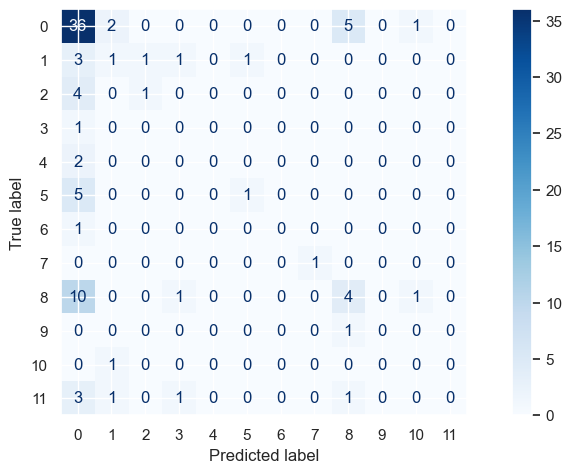

In [232]:
# Example: After model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)  # Predicted labels
y_true = y_test                 # Actual labels

# Now plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


In [233]:
# will store result of each model.

result = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

In [234]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)

In [235]:
from sklearn.metrics import accuracy_score, recall_score

In [236]:
knn_train_accuracy = accuracy_score(y_train, knnclassifier.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knnclassifier.predict(X_test))
knn_train_recall = recall_score(y_train, knnclassifier.predict(X_train),average="weighted")
knn_test_recall = recall_score(y_test, knnclassifier.predict(X_test),average="weighted")

In [237]:
print('Train Recall score: {}'
      .format(knn_train_recall))
print('Test Recall score: {}'
      .format(knn_test_recall))
confusion_matrix(y_test, y_pred)

Train Recall score: 0.6842105263157895
Test Recall score: 0.5494505494505495


array([[42,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 6,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [12,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [238]:
new_row = pd.DataFrame([{'Model': 'KNN Classifier',
                         'Train Accuracy': knn_train_accuracy,
                         'Test Accuracy': knn_test_accuracy}])

result = pd.concat([result, new_row], ignore_index=True)
result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.684211,0.549451


In [239]:
from sklearn.linear_model import LogisticRegression
lgclassifier = LogisticRegression(solver = 'saga',random_state = 0) 
lgclassifier.fit(X_train, y_train) 
y_pred = lgclassifier.predict(X_test)

In [240]:
lg_train_recall = recall_score(y_train, lgclassifier.predict(X_train),average='weighted')
lg_test_recall = recall_score(y_test, lgclassifier.predict(X_test),average='weighted')
lg_train_accuracy = accuracy_score(y_train, lgclassifier.predict(X_train))
lg_test_accuracy = accuracy_score(y_test, lgclassifier.predict(X_test))

In [241]:
print('Train Recall score: {}'
      .format(lg_train_recall))
print('Test Recall score: {}'
      .format(lg_test_recall))
confusion_matrix(y_test, y_pred)

Train Recall score: 0.6703601108033241
Test Recall score: 0.5164835164835165


array([[39,  0,  0,  0,  0,  0,  0,  0,  4,  0,  1,  0],
       [ 4,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [10,  0,  0,  1,  0,  0,  0,  0,  4,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0]])

In [242]:
new_row = pd.DataFrame([{'Model': 'Logistic Regression',
                         'Train Accuracy': lg_train_accuracy,
                         'Test Accuracy': lg_test_accuracy}])

result = pd.concat([result, new_row], ignore_index=True)

result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.684211,0.549451
1,Logistic Regression,0.670360,0.516484


In [243]:
from sklearn.tree import DecisionTreeClassifier 
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=5)
dtclassifier.fit(X_train, y_train) 
y_pred_test = dtclassifier.predict(X_test)
y_pred_train = dtclassifier.predict(X_train)

In [244]:
dt_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
dt_test_recall = recall_score(y_test, y_pred_test,average="weighted")
dt_train_accuracy = accuracy_score(y_train,y_pred_train )
dt_test_accuracy = accuracy_score(y_test, y_pred_test)

In [245]:
print('Train Recall score: {}'
      .format(dt_train_recall))
print('Test Recall score: {}'
      .format(dt_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7146814404432132
Test Recall score: 0.42857142857142855


array([[35,  3,  1,  1,  0,  0,  0,  0,  2,  0,  2,  0],
       [ 4,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 2,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 8,  1,  2,  0,  1,  0,  0,  0,  2,  1,  1,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0]])

In [246]:
new_row = pd.DataFrame([{'Model': 'Decision Tree Classifier',
                         'Train Accuracy': dt_train_accuracy,
                         'Test Accuracy': dt_test_accuracy}])

result = pd.concat([result, new_row], ignore_index=True)

result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.684211,0.549451
1,Logistic Regression,0.670360,0.516484
2,Decision Tree Classifier,0.714681,0.428571


In [247]:
from sklearn.svm import LinearSVC 
lsvclassifier = LinearSVC(C=0.01)
lsvclassifier.fit(X_train, y_train) 
y_pred_test = lsvclassifier.predict(X_test)
y_pred_train = lsvclassifier.predict(X_train)

In [248]:
lsvc_train_accuracy = accuracy_score(y_train, y_pred_train)
lsvc_test_accuracy = accuracy_score(y_test, y_pred_test)
lsvc_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
lsvc_test_recall = recall_score(y_test, y_pred_test,average="weighted")

In [249]:
print('Train Recall score: {}'
      .format(lsvc_train_recall))
print('Test Recall score: {}'
      .format(lsvc_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.6925207756232687
Test Recall score: 0.5384615384615384


array([[41,  0,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0],
       [ 4,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 4,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [10,  0,  1,  0,  0,  0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [250]:
new_row = pd.DataFrame([{
    'Model': 'Linear SVC',
    'Train Accuracy': lsvc_train_accuracy,
    'Test Accuracy': lsvc_test_accuracy
}])

result = pd.concat([result, new_row], ignore_index=True)

result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.684211,0.549451
1,Logistic Regression,0.670360,0.516484
2,Decision Tree Classifier,0.714681,0.428571
3,Linear SVC,0.692521,0.538462


In [251]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)
KSVC_clf.fit(X_train, y_train)
y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

In [252]:
ksvc_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
ksvc_test_recall = recall_score(y_test, y_pred_test,average="weighted")

ksvc_train_accuracy = accuracy_score(y_train, y_pred_train)
ksvc_test_accuracy = accuracy_score(y_test, y_pred_test)

In [253]:
print('Train Recall score: {}'
      .format(ksvc_train_recall))
print('Test Recall score: {}'
      .format(ksvc_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.556786703601108
Test Recall score: 0.4835164835164835


array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [254]:
new_row = pd.DataFrame([{
    'Model': 'Kernelized SVC',
    'Train Accuracy': ksvc_train_accuracy,
    'Test Accuracy': ksvc_test_accuracy
}])

result = pd.concat([result, new_row], ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.684211,0.549451
1,Logistic Regression,0.670360,0.516484
2,Decision Tree Classifier,0.714681,0.428571
3,Linear SVC,0.692521,0.538462
4,Kernelized SVC,0.556787,0.483516


In [255]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=100,max_depth=10,max_leaf_nodes=30)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=100, max_leaf_nodes=30,
                       n_estimators=300)

In [256]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

rf_train_accuracy = accuracy_score(y_train, y_pred_train)
rf_test_accuracy = accuracy_score(y_test, y_pred_test)
rf_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
rf_test_recall = recall_score(y_test, y_pred_test,average="weighted")

In [257]:
print('Train Recall score: {}'
      .format(rf_train_recall))
print('Test Recall score: {}'
      .format(rf_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8421052631578947
Test Recall score: 0.5604395604395604


array([[42,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 4,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [11,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0]])

In [258]:
new_row = pd.DataFrame([{
    'Model': 'Random Forest Classifier',
    'Train Accuracy': rf_train_accuracy,
    'Test Accuracy': rf_test_accuracy
}])

result = pd.concat([result, new_row], ignore_index=True)
result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.684211,0.549451
1,Logistic Regression,0.670360,0.516484
2,Decision Tree Classifier,0.714681,0.428571
3,Linear SVC,0.692521,0.538462
4,Kernelized SVC,0.556787,0.483516
5,Random Forest Classifier,0.842105,0.560440


In [259]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca.fit(X_train)
pca.n_components_

np.int64(13)

In [260]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [261]:
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV

In [262]:
from sklearn.neighbors import KNeighborsClassifier
knnp_clf = KNeighborsClassifier(n_neighbors=5)
knnp_clf.fit(X_train_pca, y_train)
y_pred_train = knnp_clf.predict(X_train_pca)
y_pred_test = knnp_clf.predict(X_test_pca)

In [263]:
knnp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
knnp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
knnp_train_accuracy = accuracy_score(y_train, y_pred_train)
knnp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [264]:
print('Train Recall score: {}'
      .format(knnp_train_recall))
print('Test Recall score: {}'
      .format(knnp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.6814404432132964
Test Recall score: 0.5604395604395604


array([[42,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 5,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [12,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [265]:
new_row = pd.DataFrame([{
    'Model': 'KNN Classifier with PCA',
    'Train Accuracy': knnp_train_accuracy,
    'Test Accuracy': knnp_test_accuracy
}])

result = pd.concat([result, new_row], ignore_index=True)
result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.684211,0.549451
1,Logistic Regression,0.670360,0.516484
2,Decision Tree Classifier,0.714681,0.428571
3,Linear SVC,0.692521,0.538462
4,Kernelized SVC,0.556787,0.483516
5,Random Forest Classifier,0.842105,0.560440
6,KNN Classifier with PCA,0.681440,0.560440


In [266]:
from sklearn.linear_model import LogisticRegression
lgp_clf = LogisticRegression(solver='saga',C=0.01)
lgp_clf.fit(X_train_pca, y_train)
y_pred_train = lgp_clf.predict(X_train_pca)
y_pred_test = lgp_clf.predict(X_test_pca)

In [267]:
lgp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
lgp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
lgp_train_accuracy = accuracy_score(y_train, y_pred_train)
lgp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [268]:
print('Train Recall score: {}'
      .format(lgp_train_recall))
print('Test Recall score: {}'
      .format(lgp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.5983379501385041
Test Recall score: 0.38461538461538464


array([[24,  4,  0,  3,  1,  5,  0,  0,  0,  6,  0,  1,  0],
       [ 1,  3,  1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 4,  0,  1,  1,  1,  1,  0,  0,  1,  5,  0,  2,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0]])

In [269]:
import pandas as pd

new_row = pd.Series({'Model':'Logestic Regression with PCA',
                     'Train Accuracy': lgp_train_accuracy,
                     'Test Accuracy': lgp_test_accuracy})

# Convert the Series to a DataFrame with one row
new_row_df = new_row.to_frame().T

# Concatenate with the existing DataFrame
result = pd.concat([result, new_row_df], ignore_index=True)

result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.684211,0.549451
1,Logistic Regression,0.67036,0.516484
2,Decision Tree Classifier,0.714681,0.428571
3,Linear SVC,0.692521,0.538462
4,Kernelized SVC,0.556787,0.483516
5,Random Forest Classifier,0.842105,0.56044
6,KNN Classifier with PCA,0.68144,0.56044
7,Logestic Regression with PCA,0.598338,0.384615


In [270]:
from sklearn.svm import LinearSVC
LSVC_clf = LinearSVC(C=0.001)
LSVC_clf.fit(X_train_pca, y_train)
y_pred_train = LSVC_clf.predict(X_train_pca)
y_pred_test = LSVC_clf.predict(X_test_pca)


In [271]:

lsvcp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
lsvcp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
lsvcp_train_accuracy = accuracy_score(y_train, y_pred_train)
lsvcp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [272]:
print('Train Recall score: {}'
      .format(lsvcp_train_recall))
print('Test Recall score: {}'
      .format(lsvcp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.631578947368421
Test Recall score: 0.4945054945054945


array([[36,  2,  0,  0,  1,  0,  0,  0,  5,  0,  0,  0],
       [ 3,  2,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  1,  0,  0,  1,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  1,  2,  0,  0,  0]])

In [273]:
new_row = pd.Series({
    'Model': 'Linear SVC with PCA',
    'Train Accuracy': lsvcp_train_accuracy,
    'Test Accuracy': lsvcp_test_accuracy
})

new_row_df = new_row.to_frame().T
result = pd.concat([result, new_row_df], ignore_index=True)
result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.684211,0.549451
1,Logistic Regression,0.67036,0.516484
2,Decision Tree Classifier,0.714681,0.428571
3,Linear SVC,0.692521,0.538462
4,Kernelized SVC,0.556787,0.483516
5,Random Forest Classifier,0.842105,0.56044
6,KNN Classifier with PCA,0.68144,0.56044
7,Logestic Regression with PCA,0.598338,0.384615
8,Linear SVC with PCA,0.631579,0.494505


In [274]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)

KSVC_clf.fit(X_train_pca, y_train)
y_pred_train = KSVC_clf.predict(X_train_pca)
y_pred_test = KSVC_clf.predict(X_test_pca)

In [275]:
ksvcp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
ksvcp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
ksvcp_train_accuracy = accuracy_score(y_train, y_pred_train,)
ksvcp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [276]:
print('Train Recall score: {}'
      .format(ksvcp_train_recall))
print('Test Recall score: {}'
      .format(ksvcp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.49584487534626037
Test Recall score: 0.43956043956043955


array([[37,  3,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0],
       [ 5,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [13,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [277]:
new_row = pd.Series({
    'Model': 'kernelized SVC with PCA',
    'Train Accuracy': ksvcp_train_accuracy,
    'Test Accuracy': ksvcp_test_accuracy
})

new_row_df = new_row.to_frame().T
result = pd.concat([result, new_row_df], ignore_index=True)
result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.684211,0.549451
1,Logistic Regression,0.67036,0.516484
2,Decision Tree Classifier,0.714681,0.428571
3,Linear SVC,0.692521,0.538462
4,Kernelized SVC,0.556787,0.483516
5,Random Forest Classifier,0.842105,0.56044
6,KNN Classifier with PCA,0.68144,0.56044
7,Logestic Regression with PCA,0.598338,0.384615
8,Linear SVC with PCA,0.631579,0.494505
9,kernelized SVC with PCA,0.495845,0.43956


In [278]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 2,max_depth=5)
dt_clf.fit(X_train_pca, y_train)
y_pred_train = dt_clf.predict(X_train_pca)
y_pred_test = dt_clf.predict(X_test_pca)

In [279]:
dtp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
dtp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
dtp_train_accuracy = accuracy_score(y_train, y_pred_train)
dtp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [280]:
print('Train Recall score: {}'
      .format(dtp_train_recall))
print('Test Recall score: {}'
      .format(dtp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.667590027700831
Test Recall score: 0.5164835164835165


array([[43,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 5,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [14,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [281]:
new_row = pd.Series({
    'Model': 'DecisionTree Classifier with PCA',
    'Train Accuracy': dtp_train_accuracy,
    'Test Accuracy': dtp_test_accuracy
})

new_row_df = new_row.to_frame().T
result = pd.concat([result, new_row_df], ignore_index=True)
result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.684211,0.549451
1,Logistic Regression,0.67036,0.516484
2,Decision Tree Classifier,0.714681,0.428571
3,Linear SVC,0.692521,0.538462
4,Kernelized SVC,0.556787,0.483516
5,Random Forest Classifier,0.842105,0.56044
6,KNN Classifier with PCA,0.68144,0.56044
7,Logestic Regression with PCA,0.598338,0.384615
8,Linear SVC with PCA,0.631579,0.494505
9,kernelized SVC with PCA,0.495845,0.43956


In [282]:
from sklearn.ensemble import RandomForestClassifier
rfp_clf = RandomForestClassifier()
rfp_clf.fit(X_train_pca, y_train)
y_pred_train = rfp_clf.predict(X_train_pca)
y_pred_test = rfp_clf.predict(X_test_pca)

In [283]:
rfp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
rfp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
rfp_train_accuracy = accuracy_score(y_train, y_pred_train)
rfp_test_accuracy = accuracy_score(y_test, y_pred_test)	


In [284]:
print('Train Recall score: {}'
      .format(rfp_train_recall))
print('Test Recall score: {}'
      .format(rfp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 1.0
Test Recall score: 0.5494505494505495


array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 4,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [13,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0]])

In [285]:
new_row = pd.Series({
    'Model': 'Random Forest Classifier with PCA',
    'Train Accuracy': rfp_train_accuracy,
    'Test Accuracy': rfp_test_accuracy
})
new_row_df = new_row.to_frame().T
result = pd.concat([result, new_row_df], ignore_index=True)
result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.684211,0.549451
1,Logistic Regression,0.67036,0.516484
2,Decision Tree Classifier,0.714681,0.428571
3,Linear SVC,0.692521,0.538462
4,Kernelized SVC,0.556787,0.483516
5,Random Forest Classifier,0.842105,0.56044
6,KNN Classifier with PCA,0.68144,0.56044
7,Logestic Regression with PCA,0.598338,0.384615
8,Linear SVC with PCA,0.631579,0.494505
9,kernelized SVC with PCA,0.495845,0.43956


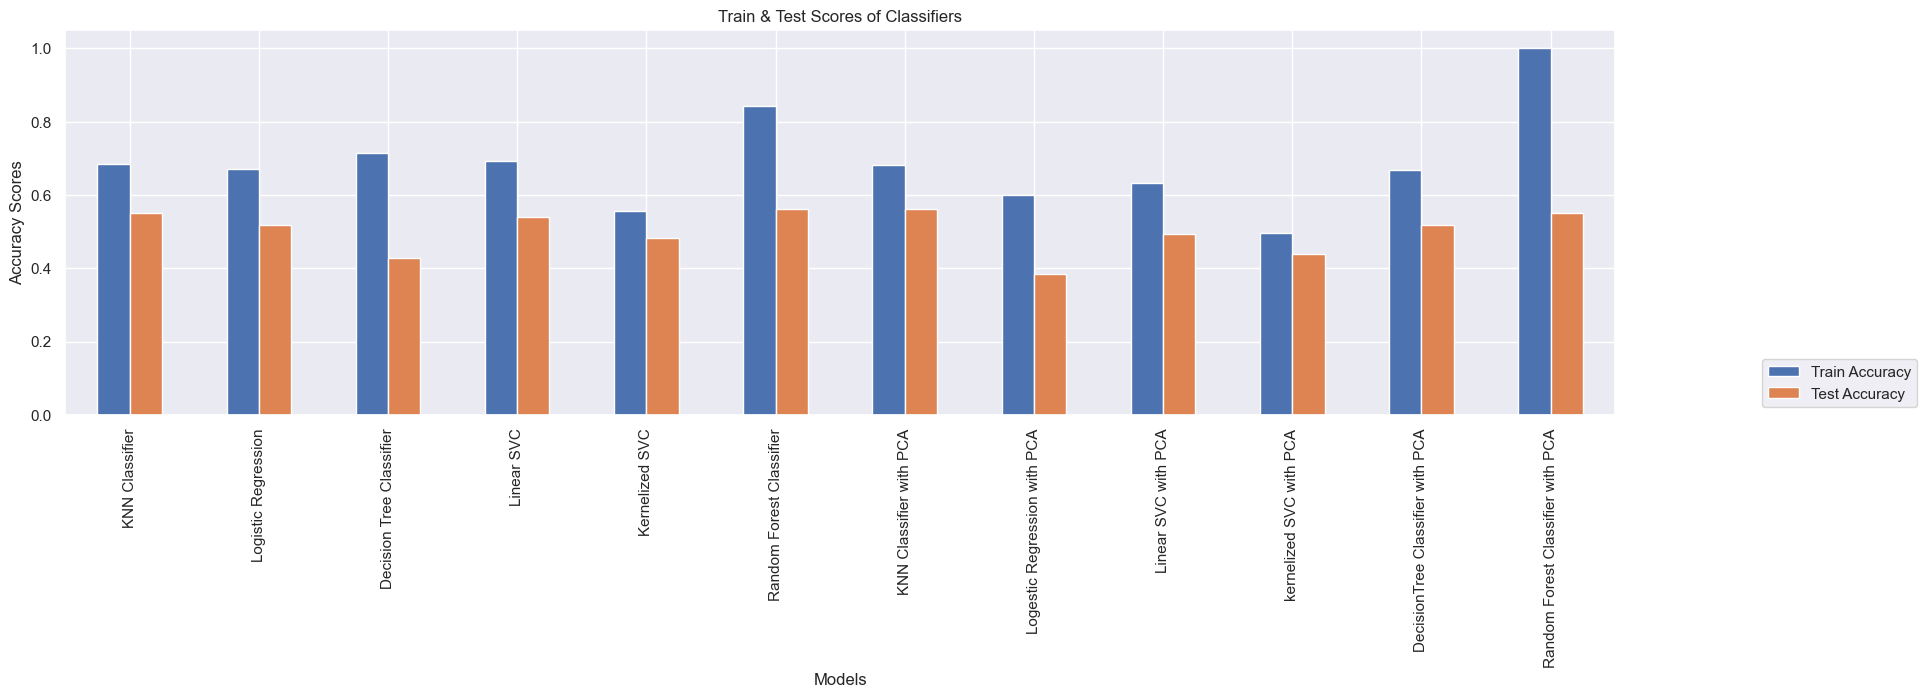

In [286]:
ax=result.plot(kind="bar",figsize=(20,5))
ax.set_xticks(result.index)
ax.set_xticklabels(result.Model,rotation=90)
plt.title('Train & Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show();

In [287]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import joblib

In [288]:
print(pca.n_components_)


13


In [289]:
# Build the pipeline
logreg_pca_model = Pipeline([
    ('pca', PCA(n_components=25)),  # You can change n_components based on your data
    ('logreg', LogisticRegression(solver='liblinear'))  # 'liblinear' works well for small datasets
])

In [290]:
print(X_train.shape)  # (num_samples, num_features)


(361, 25)


In [291]:
# Step B: Train the model
logreg_pca_model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=25)),
                ('logreg', LogisticRegression(solver='liblinear'))])

In [292]:
joblib.dump(logreg_pca_model, 'logreg_pca_model.joblib')

['logreg_pca_model.joblib']

In [293]:
loaded_model = joblib.load('logreg_pca_model.joblib')

In [294]:
# Example: Suppose you want to predict on the first 5 samples from your test set
X_new = X_test[:5]  # or define your own custom input as a NumPy array or DataFrame

# Now predict
y_pred_new = loaded_model.predict(X_new)

print("Predictions:")
for i, label in enumerate(y_pred_new):
    class_index = int(label) - 1  # adjust for 0-based indexing
    print(f"Sample {i+1}: Class {int(label)} -> {class_names[class_index]}")

Predictions:
Sample 1: Class 1 -> Normal
Sample 2: Class 1 -> Normal
Sample 3: Class 1 -> Normal
Sample 4: Class 2 -> Ischemic changes (CAD)
Sample 5: Class 1 -> Normal


In [296]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Class {u}: {c} samples")


Class 1.0: 201 samples
Class 2.0: 37 samples
Class 3.0: 10 samples
Class 4.0: 14 samples
Class 5.0: 11 samples
Class 6.0: 19 samples
Class 7.0: 3 samples
Class 8.0: 1 samples
Class 9.0: 8 samples
Class 10.0: 34 samples
Class 14.0: 3 samples
Class 15.0: 4 samples
Class 16.0: 16 samples


In [300]:
import pandas as pd

# Your selected features
selected_features = [
    'Age', 'Sex', 'Height', 'Weight', 'Heart_Rate',
    'QRS_Dur', 'P-R_Int', 'Q-T_Int', 'T_Int',
    'Q_Wave', 'R_Wave', 'S_Wave', "R'_Wave", "S'_Wave",
    'Amp_R_Wave', 'JJ_Wave', 'Int_Def', 'QRSA', 'QRSTA',
    'DII_mean', 'DIII_mean', 'AVR_mean',
    'DII_max', 'DIII_max', 'AVR_max'
]

# The arrhythmia.csv has 279 feature columns + 1 target column (280 total)
# Let's create generic column names for all features + target:
all_columns = [f'feature_{i}' for i in range(1, 280)] + ['target']

# Load dataset with generic column names
df = pd.read_csv('arrhythmia.csv', header=None, names=all_columns, na_values='?')

# Now, to access only your selected features, you need to know which
# 'feature_i' corresponds to each feature name in selected_features.

# You need a mapping from your feature names to column indexes in arrhythmia.csv.

# For example, assuming the order in arrhythmia.csv columns matches your feature list:

# Let's say these features correspond to these column indexes (example mapping):
feature_name_to_index = {
    'Age': 0,
    'Sex': 1,
    'Height': 2,
    'Weight': 3,
    'Heart_Rate': 4,
    'QRS_Dur': 5,
    'P-R_Int': 6,
    'Q-T_Int': 7,
    'T_Int': 8,
    'Q_Wave': 9,
    'R_Wave': 10,
    'S_Wave': 11,
    "R'_Wave": 12,
    "S'_Wave": 13,
    'Amp_R_Wave': 14,
    'JJ_Wave': 15,
    'Int_Def': 16,
    'QRSA': 17,
    'QRSTA': 18,
    'DII_mean': 19,
    'DIII_mean': 20,
    'AVR_mean': 21,
    'DII_max': 22,
    'DIII_max': 23,
    'AVR_max': 24,
}

# Extract columns from dataframe by index for your features:
selected_columns = [f'feature_{feature_name_to_index[feat]+1}' for feat in selected_features]

# Add target column
selected_columns.append('target')

# Subset dataframe with only selected features + target
df_selected = df[selected_columns]

# Rename columns to your selected_features + 'target'
df_selected.columns = selected_features + ['target']

# Now df_selected contains only the columns you want, with proper names

print(df_selected.head())

# Access first row:
print(df_selected.iloc[0])


   Age  Sex  Height  Weight  Heart_Rate  QRS_Dur  P-R_Int  Q-T_Int  T_Int  \
0   75    0     190      80          91      193      371      174    121   
1   56    1     165      64          81      174      401      149     39   
2   54    0     172      95         138      163      386      185    102   
3   55    0     175      94         100      202      380      179    143   
4   75    0     190      80          88      181      360      177    103   

   Q_Wave  ...  Int_Def  QRSA  QRSTA  DII_mean  DIII_mean  AVR_mean  DII_max  \
0     -16  ...       52    44      0         0         32         0        0   
1      25  ...       48     0      0         0         24         0        0   
2      96  ...       40    80      0         0         24         0        0   
3      28  ...       72    20      0         0         48         0        0   
4     -16  ...       48    40      0         0         28         0        0   

   DIII_max  AVR_max  target  
0         0        0     

In [3]:
import pandas as pd

# Step 1: Load the dataset from GitHub
url = "https://raw.githubusercontent.com/shsarv/Project-Arrhythmia/master/Data/arrhythmia.csv"
df = pd.read_csv(url, header=None)

# Step 2: Check the shape
print("Shape of dataset:", df.shape)  # It has (452, 280)

# Step 3: Create proper column names
# Based on UCI Arrhythmia dataset: https://archive.ics.uci.edu/dataset/44/arrhythmia
# There are 279 features + 1 class label
base_features = [
    'Age', 'Sex', 'Height', 'Weight', 'QRS_Dur', 'P-R_Int', 'Q-T_Int', 'T_Int', 'P_Int', 
    'QRS_Axis', 'T_Axis', 'P_Axis', 'Q_Wave', 'R_Wave', 'S_Wave', "R'_Wave", "S'_Wave", 
    'Amp_R_Wave', 'JJ_Wave', 'Amp_J_Wave', 'QRS_Duration', 'Int_Def', 'QRSA', 'QRSTA'
]
other_features = [f'feature_{i}' for i in range(24, 279)]
column_names = base_features + other_features + ['Class']

# Sanity check:
print(f"Number of column names = {len(column_names)}")  # Should match 280

# Assign column names
df.columns = column_names

# Step 4: Your selected features
selected_features = [
    'Age', 'Sex', 'Height', 'Weight', 'QRS_Dur', 'P-R_Int', 'Q-T_Int', 'T_Int',
    'Q_Wave', 'R_Wave', 'S_Wave', "R'_Wave", "S'_Wave", 'Amp_R_Wave', 'JJ_Wave', 'Int_Def', 'QRSA', 'QRSTA',
    'feature_108', 'feature_109', 'feature_110',  # DII_mean, DIII_mean, AVR_mean (approx mapping)
    'feature_122', 'feature_123', 'feature_124'   # DII_max, DIII_max, AVR_max (approx mapping)
]

# Step 5: Find min and max values
summary = pd.DataFrame(columns=["Feature", "Min", "Max"])

for feature in selected_features:
    if feature in df.columns:
        min_value = df[feature].min(skipna=True)
        max_value = df[feature].max(skipna=True)
        summary = pd.concat(
            [summary, pd.DataFrame([[feature, min_value, max_value]], columns=["Feature", "Min", "Max"])],
            ignore_index=True
        )
    else:
        print(f"⚠️ {feature} not found in dataset columns.")

# Step 6: Display summary
print(summary)


Shape of dataset: (452, 280)
Number of column names = 280
        Feature   Min  Max
0           Age     0   83
1           Sex     0    1
2        Height   105  780
3        Weight     6  176
4       QRS_Dur    55  188
5       P-R_Int     0  524
6       Q-T_Int   232  509
7         T_Int   108  381
8        Q_Wave    -1    ?
9        R_Wave  -105    ?
10       S_Wave   100    ?
11      R'_Wave     0   88
12      S'_Wave     0  156
13   Amp_R_Wave     0   88
14      JJ_Wave     0   24
15      Int_Def     0    1
16         QRSA     0    1
17        QRSTA     0    1
18  feature_108     0    1
19  feature_109     0    1
20  feature_110     0    1
21  feature_122     0    1
22  feature_123     0   88
23  feature_124     0   92


In [4]:
import joblib
model = joblib.load(r"C:\Project\arrhythmia (1)\arrhythmia\logreg_pca_model.joblib")

print(type(model))               # Is this something like sklearn.pipeline.Pipeline?
print(hasattr(model, "steps"))   # True if it’s a Pipeline


<class 'sklearn.pipeline.Pipeline'>
True


In [12]:
import pandas as pd
import numpy as np

# Load and preprocess the full dataset as before
url = "https://raw.githubusercontent.com/shsarv/Project-Arrhythmia/master/Data/arrhythmia.csv"
df = pd.read_csv(url, header=None)
# … (assign df.columns = column_names, subset to selected_features plus “Class”)

# Let’s create X_all and y_all
X_all = df[selected_features].values          # shape (452, 24)
y_all = df["Class"].values                   # shape (452,)

# Now take the first 5 rows:
X_new = X_all[:5]
y_pred_new = model.predict(X_new)             # model is your loaded Pipeline

print("Predicted classes for first 5 samples:", y_pred_new)


KeyError: "None of [Index(['Age', 'Sex', 'Height', 'Weight', 'QRS_Dur', 'P-R_Int', 'Q-T_Int',\n       'T_Int', 'Q_Wave', 'R_Wave', 'S_Wave', 'R'_Wave', 'S'_Wave',\n       'Amp_R_Wave', 'JJ_Wave', 'Int_Def', 'QRSA', 'QRSTA', 'feature_108',\n       'feature_109', 'feature_110', 'feature_122', 'feature_123',\n       'feature_124'],\n      dtype='object')] are in the [columns]"